In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(suppress=True) #prevent numpy exponential

# DFT and IDFT :

In [2]:
def trans_mat(N):
    w=np.ones((N,N), dtype= np.complex64)
    wn= np.exp(-1j*2*np.pi/N)
    row = []
    val=1
    for i in range(N):
        row.append(val)
        val= val*wn
    row= np.array(row)
    #print(row)
    w[1]= row
    newRow= row
    for i in range(N-2):
        newRow= newRow*row
        w[i+2]= newRow
        #print(newRow)
    return w

In [3]:
def my_dft(x):
    N= len(x)
    out= np.dot(trans_mat(N), x)
    return out

In [4]:
d= my_dft([1,2,2,1])
d

array([ 6.+0.j, -1.-1.j,  0.-0.j, -1.+1.j])

In [5]:
def my_idft(X):
    K=len(X)
    out= (1/K)*np.matmul(np.conjugate(trans_mat(K)), X)
    return np.absolute(out)

In [6]:
my_idft(d)

array([1., 2., 2., 1.])

# DCT and IDCT :

In [7]:
def my_dct(x):
    N=len(x)
    mat= np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            mat[i][j]= 2*np.cos(np.pi*(2*j+1)*i/(2*N))
    out= np.dot(mat, x)
    return out

In [8]:
x= [1,2,3,4]
c=my_dct(x)
c

array([20.        , -6.30864406, -0.        , -0.44834153])

In [9]:
def my_idct(X):
    K= len(X)
    #print(K)
    mat= np.zeros((K,K), dtype=np.float)
    for i in range(K):
        for j in range(K):
            if(j==0):
                mat[i][j]= (1/(2*K))*np.cos(np.pi*j*(2*i+1)/(2*K))
            else:
                mat[i][j]= (1/(1*K))*np.cos(np.pi*j*(2*i+1)/(2*K))
    out= np.dot(mat, X)
    return out

In [10]:
my_idct(c)

array([1., 2., 3., 4.])

# Haar Transform & Inverse :

In [11]:
def my_haar(x):
    v= (int)(np.log2(len(x)))
    initial= np.array([[1.0]])
    const1= np.array([math.sqrt(0.5),math.sqrt(0.5)])
    const2= np.array([math.sqrt(0.5),-math.sqrt(0.5)])
    for i in range(1,v+1):
        shape= (int)(pow(2,i-1))
        upper= np.kron(initial, const1)
        lower= np.kron(np.identity(shape), const2)
        initial= np.concatenate((upper, lower), axis=0)
        #print(initial)
    #print(initial)
    out= np.dot(initial, x)
    return out

In [12]:
x=[1,2,3,4]
h= my_haar(x)
h

array([ 5.        , -2.        , -0.70710678, -0.70710678])

In [13]:
def my_ihaar(X):
    v= (int)(np.log2(len(X)))
    initial= np.array([[1.0]])
    const1= np.array([math.sqrt(0.5),math.sqrt(0.5)])
    const2= np.array([math.sqrt(0.5),-math.sqrt(0.5)])
    for i in range(1,v+1):
        shape= (int)(pow(2,i-1))
        upper= np.kron(initial, const1)
        lower= np.kron(np.identity(shape), const2)
        initial= np.concatenate((upper, lower), axis=0)
        #print(initial)
    N= len(X)
    initial= np.transpose(initial)
    out= np.dot(initial, X)
    return out

In [14]:
my_ihaar(h)

array([1., 2., 3., 4.])

# Energy Compaction

In [17]:
def loss_dft(x, L):
    X_dft= my_dft(x)
    N= len(X_dft)
    low= int((N-L+1)/2)
    high= int((N-1+L)/2)
    for i in range(low, high+1):
        X_dft[i]= 0
    x1= my_idft(X_dft)
    val=np.sum(np.square(x-x1))
    return val/N

In [18]:
def loss_dct(x, L):
    X_dct= my_dct(x)
    N= len(X_dct)
    low= (int)((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        X_dct[i]= 0
    x1= my_idct(X_dct)
    #print(x1)
    val=np.sum(np.square(x-x1))
    return val/N

In [19]:
def loss_haar(x, L):
    X_haar= my_haar(x)
    N= len(X_haar)
    low= (int)((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        X_haar[i]= 0
    x1= my_ihaar(X_haar)
    val=np.sum(np.square(x-x1))
    return val/N

In [18]:
x= np.array(range(256))
dct=[]
dft=[]
haar=[]
for i in range(150, 250):
    dct.append(loss_dct(x, i))
    dft.append(loss_dft(x, i))
    haar.append(loss_haar(x,i))

dct= np.array(dct)
dft= np.array(dft)
haar= np.array(haar)

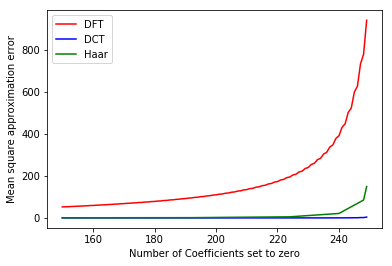

In [19]:
plt.plot(range(150,250),dft, 'r', label="DFT")
plt.plot(range(150, 250),dct, 'b', label="DCT")
plt.plot(range(150, 250),haar, 'g', label= "Haar")
plt.xlabel("Number of Coefficients set to zero")
plt.ylabel("Mean square approximation error")
plt.legend()
plt.show()

# Part 2 of Assignment :

# Compression 

In [1]:
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.fftpack import ifft
import pywt
from scipy.fftpack import dct
from scipy.fftpack import idct

In [6]:
def loss_dft2(x, L):
    N= len(x)
    X_dft= np.fft.fft(x, norm= 'ortho')
    low= int((N-L+1)/2)
    high= int((N-1+L)/2)
    for i in range(low, high+1):
        X_dft[i]= 0
    x1= np.fft.ifft(X_dft, norm= 'ortho')
    #error resolved by taking only real part of ifft and wrong for taking absolute value of ifft
    x1= np.real(x1)
    x2= np.subtract(x,x1)
    x4= np.square(x2)
    val=np.sum(x4)/N
    return val

In [7]:
y= fft(x)
np.absolute(ifft(y))

array([ 1.,  3.,  5.,  6.,  9., 11., 13., 15.])

In [8]:
x= [1,3,5,6,9,11,13,15]
loss_dft2(x, 5)

7.1712707505076185

In [9]:
def loss_dct2(x, L):
    X_dct= dct(x, norm='ortho')
    N= len(X_dct)
    low= int((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        X_dct[i]= 0
    x1= idct(X_dct, norm='ortho')
    #print(x1)
    val=np.sum(np.square(np.subtract(x,x1)))
    return val/N

In [10]:
x= [1,3,5,6,9,11,13,15]
y= dct(x, norm='ortho')
#print(y)
print(idct(y, norm='ortho'))
#loss_dct2(x, 6)

[ 1.  3.  5.  6.  9. 11. 13. 15.]


In [11]:
def loss_haar2(x, L):
    (cA, cB)= pywt.dwt(x, 'db1')
    N= len(cA)
    #print(cA)
    #print(cB)
    low= (int)((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        cA[i]= 0
        cB[i]=0
    x1= pywt.idwt(cA, cB, 'db1')
    val=np.sum(np.square(x-x1))/N
    return val

In [12]:
x= [1,3,5,6,9,11,13,15]
loss_haar2(x, 3)

164.25

In [13]:
fs, data = wavfile.read('music.wav')
fs

44100

In [37]:
data.shape

(1208718, 2)

In [14]:
x= data[:32768,1]
x= np.array(x, dtype=np.float64)

In [15]:
dctl=[]
dftl=[]

for i in range(10000, 32758, 100):
    dctl.append(loss_dct2(x, i))
    dftl.append(loss_dft2(x, i))
    #haar.append(loss_haar(x,i))

dctl= np.array(dctl)
dftl= np.array(dftl)
#haar= np.array(haar)

In [17]:
# for 8 bits i.e. b=8, b is bit length of non zero variable
N= 32758
bits_per_sample= [8*(N-i)/N for i in range(10000, 32758, 100)]


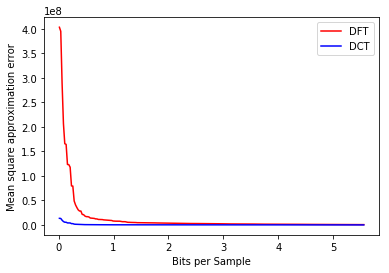

In [26]:
plt.plot(bits_per_sample, dftl, 'r', label="DFT")
plt.plot(bits_per_sample, dctl, 'b', label="DCT")
#plt.plot(range(150, 250),haar, 'g', label= "Haar")
plt.xlabel("Bits per Sample")
plt.ylabel("Mean square approximation error")
plt.legend()
plt.show()

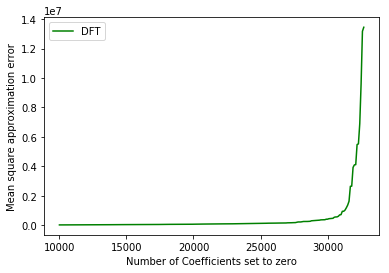

In [22]:
plt.plot(range(10000, 32758, 100), dftl, 'g', label="DFT")
plt.xlabel("Number of Coefficients set to zero")
plt.ylabel("Mean square approximation error")
plt.legend()
plt.show()

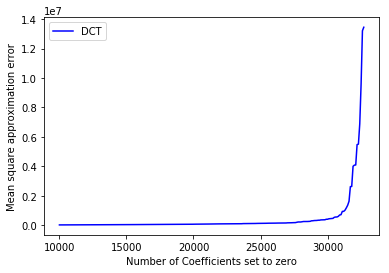

In [21]:
plt.plot(range(10000, 32758, 100), dctl, 'b', label="DCT")
plt.xlabel("Number of Coefficients set to zero")
plt.ylabel("Mean square approximation error")
plt.legend()
plt.show()

# Assignment 3

In [39]:
def dct_compressor(x, L):
    X_dct= dct(x, norm='ortho')
    N= len(X_dct)
    low= int((N-L))
    high= int((N-1))
    X_modified=[]
    X_modified.append(N)
    M= N- (high-low+1)
    X_modified.append(M)
    for i in range(0,low+1):
        X_modified.append(X_dct[i])
    return np.array(X_modified,dtype=np.float64)

In [29]:
def dct_decompressor(arr):
    N= arr[0]
    M= arr[1]
    L= N-M
    low= int((N-L))
    high= int((N-1))
    X_dct= arr[2:]
    for i in range(low+1, high):
        X_dct.append(0)
    x1= idct(X_dct, norm='ortho')
    return x1

In [30]:
fs, data = wavfile.read('music.wav')

x= data[:32768,1]
x= np.array(x, dtype=np.float64)

In [34]:
x[:20]

array([ 5024.,  8052.,  9561.,  7447.,  9184.,  5403., 10511., 10361.,
        9945.,  2410.,  1895.,  7416.,  4738.,  2707.,  6694.,  7450.,
        6902.,  7945.,  3827.,  1090.])

In [40]:
# creating 20000 zeros
compressed= dct_compressor(x, 20000)

In [32]:
x1= dct_decompressor(compressed)

In [33]:
x1[:20]

array([6293.62188991, 7212.20276222, 8135.72765032, 8353.99599878,
       8174.25336623, 8393.08296326, 9094.66031241, 9326.31993153,
       8141.08639888, 5803.9243249 , 3722.3111755 , 3152.02424914,
       4112.29133323, 5598.01517815, 6643.54275298, 6977.67859331,
       6762.24543297, 6085.24848287, 4969.80946847, 3722.69342982])

In [35]:
# size consumed by original signal in bytes
x.size*x.itemsize

262144

In [41]:
# size consumed by compressed signal in bytes
compressed.size*compressed.itemsize

102168